In [1]:
import pandas as pd
df = pd.read_csv("C://Users//HP//OneDrive//Documents//Experience-Salary.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


C:\Users\HP\AppData\Local\Temp\ipykernel_14080\460110657.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df, labels=["X", "Y"])


[]

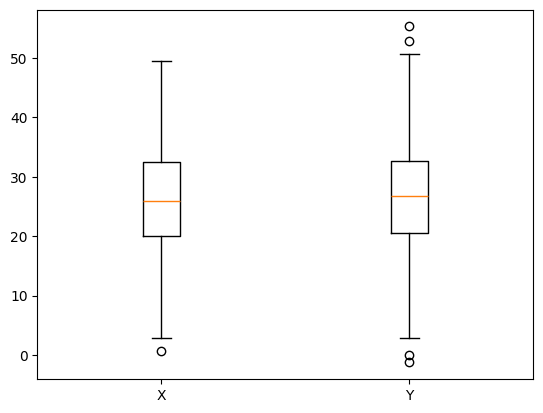

In [2]:
import matplotlib.pyplot as plt
plt.boxplot(df, labels=["X", "Y"])
plt.plot()

In [6]:
import numpy as np
def get_outliers_z_score(data, threshold=2.8):
    '''
    Returns a set of index with data having z-score value which are above 
    the threshold value
    '''
    mean = np.mean(data)
    std = np.std(data)
    size = len(data)
    outliers = list()
    for i in range(size):
        z_score = (data[i] - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)       
    return set(outliers)

outliers = list(get_outliers_z_score(list(df.iloc[:,0])).union(get_outliers_z_score(list(df.iloc[:,1]))))
print(outliers)
new_df = df.drop(index=outliers)

[772, 133, 86, 504, 47]


C:\Users\HP\AppData\Local\Temp\ipykernel_14080\3696476944.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(new_df, labels=["X", "Y"])


[]

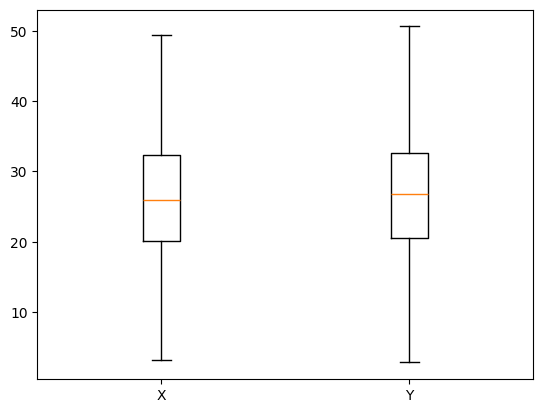

In [7]:
plt.boxplot(new_df, labels=["X", "Y"])
plt.plot()

In [9]:
def get_outliers_IQR(data):
    '''
    Returns a set of index of the outliers
    '''
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outliers = [i for i,j in enumerate(data) if j < lower or j > upper]
    return set(outliers)

iqr_outliers = list(get_outliers_IQR(list(df.iloc[:,0])).union(get_outliers_IQR(list(df.iloc[:,1]))))
print(iqr_outliers)
iqr_new_df = df.drop(index=iqr_outliers)

[772, 133, 86, 504, 47]


C:\Users\HP\AppData\Local\Temp\ipykernel_14080\3505502529.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(iqr_new_df, labels=["X", "Y"])


[]

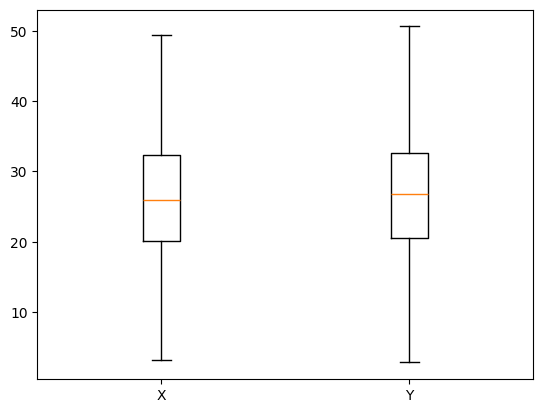

In [10]:
plt.boxplot(iqr_new_df, labels=["X", "Y"])
plt.plot()